## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

## Importing and Preprocessing the data 

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the file
- The file is not in `'.csv'` format. So we will use pd.read_table( )

In [2]:
docs = pd.read_table('SMSSpamCollection',header=None, names=['Class','sms'])

In [3]:
## checking docs
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
docs.shape

(5572, 2)

### Checking for class imbalances

In [10]:
x = docs['Class'].value_counts()
x

ham     4825
spam     747
Name: Class, dtype: int64

In [9]:
## calculating the % of spam manually
a = 747/(747+4825)*100
print('Spam % is',a)

Spam % is 13.406317300789663


In [12]:
print(x[0])
print(x[1])

4825
747


In [13]:
## calculating spam% through code
spam_percent = x[1]/(x[0]+x[1])*100
print('Spam % is',spam_percent)

Spam % is 13.406317300789663


- This value indicates no Class-Imbalance

### Converting Class labels to binary

In [14]:
## using map fucntion to convert spam to 1 and ham to 0
docs['Class']= docs['Class'].map({'ham':0,'spam':1})
docs.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Creating X and y labels

In [15]:
## X and y
X = docs['sms']
y = docs['Class']

In [18]:
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Class, Length: 5572, dtype: int64


In [19]:
X.shape

(5572,)

In [20]:
y.shape

(5572,)

In [21]:
## cheking dtype of y
y.dtype

dtype('int64')

- Already int, no need to change

### Creating train and test datasets

In [22]:
## importing libraries
from sklearn.model_selection import train_test_split

In [23]:
## splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [24]:
X_train.shape

(3900,)

### Creating Bag of Words Representation

- We will follow the normal cycle:
    - First, we will instantiate an object of CountVectorizer( ) class. This object is contained in the library sklearn.feature_extraction.text ( as we are basically extracting features from text.
    - And then, we will fit( ) the X_train array into the object.
    - Finally, we will transform( ) the X_train array and X_test array into a feature vector.
    - Remeber, while working on the test data, we will never use fit( ) method of any class, as in real life we never/rarely have test data!
    - So, for test data we only use the transform( ).

In [26]:
## importing libraries
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
## instatiating object
vect = CountVectorizer(stop_words='english')

In [31]:
## fitting X_tarin into object
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [33]:
len(vect.vocabulary_)

6914

In [34]:
print(vect.vocabulary_)

{'home': 3114, 'account': 733, 'number': 4355, 'wow': 6797, 'didn': 2076, 'think': 6112, 'common': 1733, 'ur': 6438, 'freak': 2673, 'unless': 6409, 'chop': 1630, 'yes': 6866, 'princess': 4837, 'going': 2849, 'make': 3897, 'moan': 4080, 'looks': 3775, 'like': 3693, 'wil': 6712, 'getting': 2812, 'headstart': 3028, 'im': 3236, 'leaving': 3651, 'bout': 1306, '30ish': 393, 'desperate': 2051, 'company': 1736, 'head': 3023, 'earlier': 2251, 'goin': 2848, 'meet': 3982, 'rummer': 5237, 'dont': 2172, 'know': 3555, 'bring': 1361, 'food': 2631, 'save': 5303, 'money': 4108, 'wedding': 6649, 'lingerie': 3712, 'www': 6822, 'bridal': 1354, 'petticoatdreams': 4623, 'uk': 6363, 'choose': 1628, 'superb': 5909, 'selection': 5368, 'national': 4222, 'delivery': 2024, 'brought': 1379, 'weddingfriend': 6650, 'sorry': 5654, 'll': 3737, 'later': 3619, 'havent': 3016, 'got': 2875, 'urself': 6451, 'jacket': 3387, 'ah': 807, 'ugh': 6357, 'hopefully': 3130, 'asus': 1007, 'ppl': 4781, 'randomly': 4972, 'reformat': 5

In [37]:
vect.get_feature_names()

['00',
 '000',
 '0089',
 '0121',
 '01223585236',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07808726822',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '08701752560',
 '08702490080',
 '08702840625',
 '08704050406',
 '0870

In [40]:
## transforming X_train and X_test
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [44]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3114)	1
  (1, 733)	1
  (1, 4355)	1
  (2, 1630)	1
  (2, 1733)	1
  (2, 2076)	1
  (2, 2673)	1
  (2, 6112)	1
  (2, 6409)	1
  (2, 6438)	1
  (2, 6797)	1
  (3, 2849)	1
  (3, 3897)	1
  (3, 4080)	1
  (3, 4837)	1
  (3, 6866)	1
  (4, 393)	1
  (4, 1306)	1
  (4, 1736)	1
  (4, 2051)	1
  (4, 2251)	1
  (4, 2812)	1
  (4, 2848)	1
  (4, 3023)	1
  (4, 3028)	1
  :	:
  (3895, 5099)	1
  (3895, 5857)	1
  (3895, 6033)	1
  (3895, 6195)	1
  (3895, 6428)	1
  (3896, 1486)	1
  (3896, 1709)	1
  (3896, 1938)	1
  (3896, 2879)	1
  (3896, 3661)	1
  (3897, 1591)	1
  (3897, 2903)	1
  (3897, 3417)	1
  (3897, 3474)	1
  (3897, 4052)	1
  (3897, 4113)	1
  (3897, 5010)	1
  (3897, 5361)	1
  (3898, 2253)	1
  (3898, 3430)	1
  (3898, 3774)	1
  (3898, 5964)	1
  (3899, 757)	1
  (3899, 3016)	1
  (3899, 5172)	1


- By default a `Sparse Matrix` has been created.

## Building Model

In [45]:
## importing libraries
from sklearn.naive_bayes import BernoulliNB

In [46]:
## instantiating object of BernoulliNB() class
bnb = BernoulliNB()

In [48]:
## fitting X_train_transformed and y_train into the object
bnb.fit(X_train_transformed,y_train)

BernoulliNB()

### Making class and probability predictions 

In [49]:
## making Class predictions
y_pred_class = bnb.predict(X_test_transformed)

In [50]:
y_pred_class

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
## making probability prediction
y_pred_proba = bnb.predict_proba(X_test_transformed)
y_pred_proba

array([[9.99999995e-01, 5.42712179e-09],
       [9.99999823e-01, 1.76728837e-07],
       [4.20184733e-14, 1.00000000e+00],
       ...,
       [1.00000000e+00, 9.11066946e-12],
       [1.00000000e+00, 4.27040228e-10],
       [9.99999999e-01, 7.98878707e-10]])

- Here 9.99999995e-01, 5.42712179e-09 means that the probability of 0 is  9.99999995e-01 and the probability of 1 is  5.42712179e-09

## Model Evaluation

In [55]:
## importing libraries
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix


In [58]:
## calculating accuracy
accuracy_score(y_test,y_pred_class)

0.9736842105263158

In [59]:
## confusion_matrix
confusion = confusion_matrix(y_test,y_pred_class)
print(confusion)

[[1447    1]
 [  43  181]]


In [60]:
## assigning TN,FP,TN and TP
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [62]:
## sensitivity
sensitivity = TP/(TP+FN)
print('Sensitivity:',sensitivity)
## specificity
specificity = TN/(TN+FP)
print('Specificity:',specificity)
## precision
precision = TP/(TP+FP)
print('Precision:',precision)

Sensitivity: 0.8080357142857143
Specificity: 0.9993093922651933
Precision: 0.9945054945054945


In [64]:
## calculating other metrics
print("Recall Score:",recall_score(y_test,y_pred_class))
print("F1 Score:",f1_score(y_test,y_pred_class))
print("Precision Score:",precision_score(y_test,y_pred_class))

Recall Score: 0.8080357142857143
F1 Score: 0.8916256157635467
Precision Score: 0.9945054945054945


## Building ROC curve and calculating AUC 

In [65]:
## gettiing the values for FPR,TPR and Threshold from roc_curve()
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_pred_proba[:,1])

- We are choosing y_pred_proba[:,1]  as we want the values for probability being 1. 
- Remember we have assinged 1 to spam and we are actually detecting spam here. 

In [67]:
## calculating AUC
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.9942562401341752

In [68]:
## making a dataframe to represent false_positive_rate,true_positive_rate,threshold
pd.DataFrame({'False_positive_rate':false_positive_rate,'True_positive_rate':true_positive_rate,'Threshold':threshold})

,False_positive_rate,True_positive_rate,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.241071,1.000000e+00
2,0.000000,0.272321,1.000000e+00
3,0.000000,0.281250,1.000000e+00
4,0.000000,0.312500,1.000000e+00
...,...,...,...
177,0.900552,1.000000,1.111432e-12
178,0.906077,1.000000,1.069267e-12
179,0.930939,1.000000,4.996374e-13
180,0.932320,1.000000,4.968192e-13


### Plotting the curve

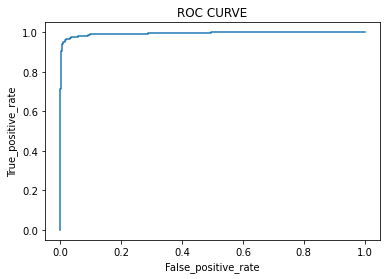

In [69]:
## making labels and plotting the curve
plt.title("ROC CURVE")
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')
plt.plot(false_positive_rate,true_positive_rate)
plt.show()